In [1]:
from qiskit.circuit import QuantumCircuit
from math import pi
from qiskit.circuit.library import U3Gate

In [2]:
RnGate = [U3Gate(theta=0.0,phi=0.0,lam=2*pi/2**k,label='R'+str(k)) for k in range(0,5,1)] #1用不上 只是方便记
RnGate_controlled =[ i.control(num_ctrl_qubits=1,label=i.label+'C',ctrl_state=1) for i in RnGate]

### 1.构造QFT

In [12]:
def QFT_(n_qubit:int):
    qc = QuantumCircuit(n_qubit)
    for i in range(0,n_qubit):
        qc.h(i)
        for k in range(i+1,n_qubit):
            #print(f'被控制位{i}控制位&k值是{k}')
            qc.append(RnGate_controlled[k+1],[k,i])
        qc.barrier()
    
    for i in range(0,n_qubit):
        if i < n_qubit-1-i:
            #print(i,n_qubit-1-i)
            qc.swap(qubit1=i,qubit2=n_qubit-1-i) 
    qc = qc
    return qc

      

### 验证dagger QFT

In [13]:
QTF = QFT_(n_qubit=4).to_instruction()
QFT_REVERSE = QFT_(n_qubit=4).to_instruction().reverse_ops()
QFT_INVERSE = QFT_(n_qubit=4).to_instruction(label='QFT_dagger').inverse() #inverse是QFT_dagger

### 2.QPE

In [14]:
U = U3Gate(theta=0.0,phi=0.0,lam=pi/4)
U.to_matrix()

array([[1.        +0.j        , 0.        -0.j        ],
       [0.        +0.j        , 0.70710678+0.70710678j]])

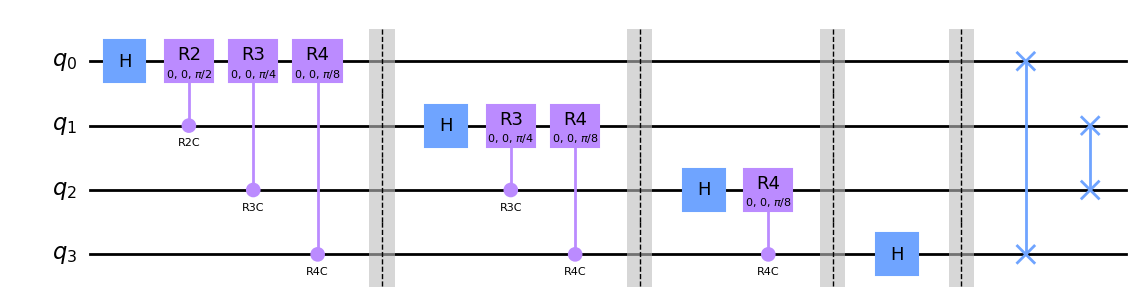

In [15]:
qc = QuantumCircuit(4)
qc.append(QTF,range(0,4))
display(qc.decompose().draw('mpl'))

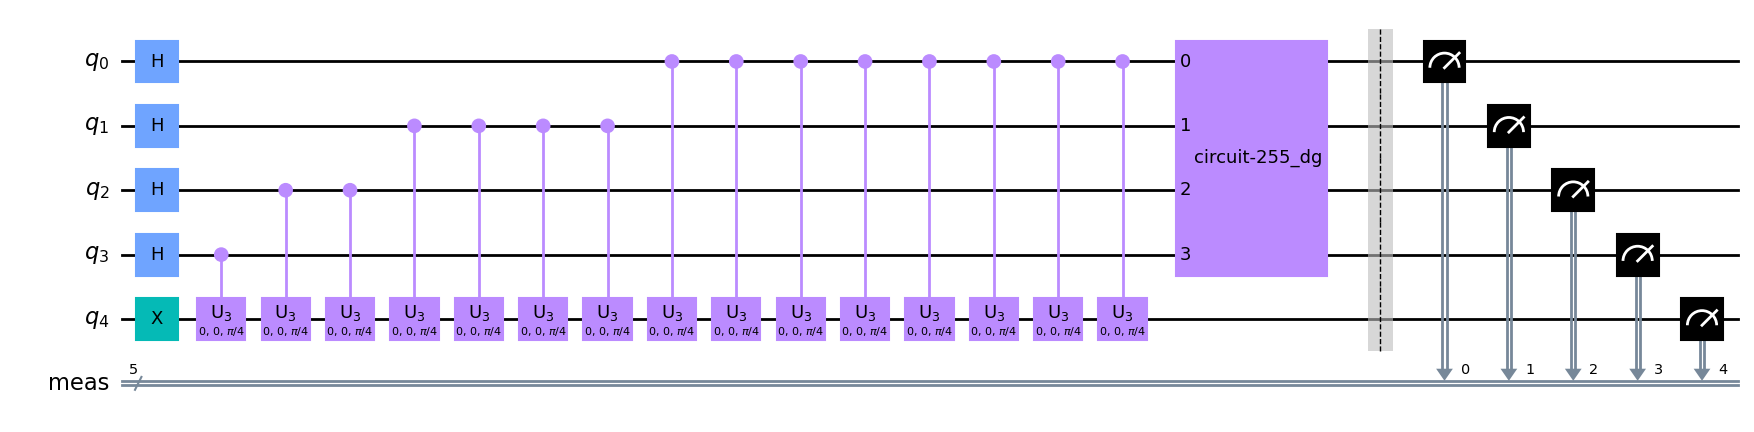

In [16]:
import warnings
warnings.filterwarnings("ignore")
qc = QuantumCircuit(5)
qc.h([0,1,2,3])
qc.x(4)
####
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=3)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=2)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=2)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=1)
##
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)
qc.cu3(theta=0.0,phi=0.0,lam=pi/4,target_qubit=4,control_qubit=0)

##
qc.append(QFT_INVERSE,range(0,4))
##
qc.measure_all()
display(qc.draw('mpl'))

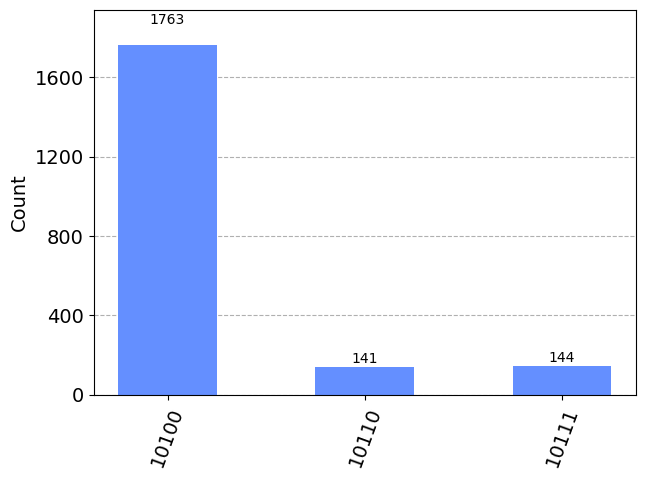

In [17]:
from qiskit.primitives import Estimator
from qiskit import execute
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
backend= Aer.get_backend('qasm_simulator')
job =execute(experiments=qc,shots=2048,backend=backend)
result = job.result()
answer = result.get_counts()
plot_histogram(answer)